In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 18.2 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import packages
import pandas as pd
from rdkit import Chem
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
with open('/content/DataSet1.txt', 'r') as f:
    lines = f.readlines()

sequences = []
rg_values = []
for line in lines[2:]:
    fields = line.split()
    sequences.append(fields[0])
    rg_values.append(float(fields[1]))

**Creating n-gram features from sequences** 

To extract features for a machine learning model from sequences of several molecules made of 2 moieties, we can use the concept of n-grams. N-grams are contiguous sequences of n items from a given sample of text or speech. In our case, the n-grams will be contiguous sequences of n characters from the sequences of the molecules. By extracting n-grams from the sequences, we can create numerical features that can be used as input to the machine learning model.

In [ ]:
# Create n-gram features using CountVectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 3))
x = vectorizer.fit_transform(sequences)
x = x.toarray()

In [ ]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, rg_values, test_size=0.1, random_state=42)
x_train, x_valid, y_train, y_valid  = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_train)

(7876, 8)
(6379, 8)
[[39  3  3 ...  5  4 38]
 [22 11  6 ...  4  9 25]
 [38  3  3 ...  6  5 35]
 ...
 [38  3  4 ...  6  4 36]
 [38  3  3 ...  6  5 35]
 [39  3  3 ...  5  4 38]]


### Random forest regressor model

In [ ]:
# Train a machine learning model on the n-gram features
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [ ]:
# Predictions on test data
y_pred_rf = rf_model.predict(x_test)

# Evaluating the rf_model on the test set
mse1 = mean_squared_error(y_pred, y_test)
print('Test mean squared error - random forest regressor:', mse1)

Test mean squared error - random forest regressor: 0.032599438639909


### XGBoost regressor model

In [ ]:
# Define the model
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)

# Train the model
xgb_res = xgb_model.fit(x_train, y_train)


In [ ]:
# Predict on test data
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate the model
mse2 = mean_squared_error(y_pred, y_test)
print('Test MSE for predicting "radius of gyration" by XGBoost model:', mse2)

Test MSE for predicting "radius of gyration" by XGBoost model: 0.032599438639909


### Parity plots

**For Random Forest regressor model**

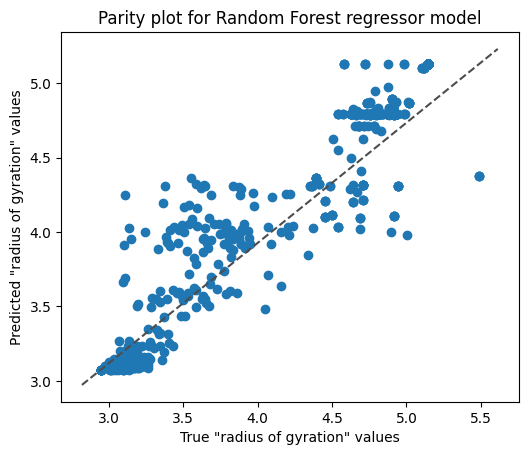

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls='--', c='.3')
ax.set_xlabel('True "radius of gyration" values')
ax.set_ylabel('Predicted "radius of gyration" values')
ax.set_title('Parity plot for Random Forest regressor model')
ax.set_aspect("equal")
plt.show()

**For XGBoost regressor**

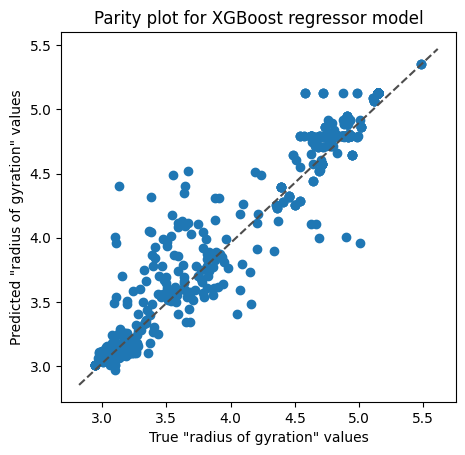

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_xgb)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls='--', c='.3')
ax.set_xlabel('True "radius of gyration" values')
ax.set_ylabel('Predicted "radius of gyration" values')
ax.set_title('Parity plot for XGBoost regressor model')
ax.set_aspect("equal")
plt.show()